Importing modules

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from Layer import *
from network import Network
from activation_func import tanh, tanh_prime, sigmoid, sigmoid_prime, softmax, softmax_prime, relu, relu_prime
from loss_func import mse, mse_prime, cross_entropy, cross_entropy_prime
from data_func import vectorize_labels, k_fold, import_data
from performance_func import plot_confusion_matrix, plot_error

Importing data

In [2]:
# import data and initialize seed
np.random.seed(10)
training_size = 3000
normalize = True
training, labels, test, original_test_labels, test_labels = import_data(size=training_size, normalize=normalize)

# specify input and output parameters
features = 784
output_classes = 10

Setting configuration

In [3]:
# hyper parameters
learning_rate = 5e-3
hidden_layers = [30]
max_epochs = 10
batch_size = 10
weight_decay = 0.01
momentum = False



Train the network

In [4]:
%%time
# set up the network with specified layers, loss, and activation
net = Network()
net.setup_net(hidden_layers, features, output_classes,
              activation=relu, activation_prime=relu_prime,
              loss_activation=softmax, loss_activation_prime=softmax_prime,
              loss=cross_entropy, loss_prime=cross_entropy_prime)
# prepare data for training
fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = k_fold(training, labels, k=5, n=5)

# train the model on training data and labels using specific hyper-parameters
errors, val_errors, val_accs = net.fit(fold_train_data, fold_train_labels, fold_val_data, fold_val_labels,
                             max_epochs, learning_rate, batch_size, momentum, weight_decay)

# print the accuracy
print("The test accuracy of the network is: {}".format(
      net.accuracy(x=test, y_true=original_test_labels, errors=errors, val_errors=val_errors)))

epoch 1/10   training error=3.235184  validation error=2.029763 validation accuracy=0.345000 ETA=0:00:03 tpe=0.326923
epoch 2/10   training error=1.597299  validation error=1.363758 validation accuracy=0.591667 ETA=0:00:03 tpe=-0.005590
epoch 3/10   training error=1.172808  validation error=1.088734 validation accuracy=0.668333 ETA=0:00:02 tpe=0.001563
epoch 4/10   training error=0.956478  validation error=0.929207 validation accuracy=0.706667 ETA=0:00:02 tpe=0.000615
epoch 5/10   training error=0.818982  validation error=0.827835 validation accuracy=0.740000 ETA=0:00:02 tpe=-0.004566
epoch 6/10   training error=0.722251  validation error=0.748260 validation accuracy=0.763333 ETA=0:00:01 tpe=0.001390
epoch 7/10   training error=0.655422  validation error=0.693233 validation accuracy=0.781667 ETA=0:00:01 tpe=0.000760
epoch 8/10   training error=0.607134  validation error=0.653147 validation accuracy=0.798333 ETA=0:00:01 tpe=-0.000646
epoch 9/10   training error=0.562559  validation erro

Plot results

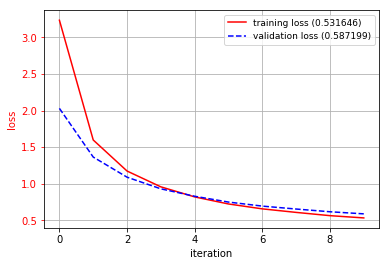

In [5]:
plot_error(errors, val_errors)